# <strong> Import libraries</strong>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# <strong> Read data</strong>

In [16]:
covid_df = pd.read_csv('../data/final_data.csv')
last_day = covid_df[covid_df['Date'] == '2023-03-10']

### &#9889; **Question 9: Predict the number of COVID-19 deaths**
There are many steps to answer this question:
- Calculate correlation between the number of deaths and the other variables.
- Select the variables with high correlation.
- Build a linear regression model.

In [17]:
last_day = last_day.drop(['Date','Continent', 'Country'], axis=1)

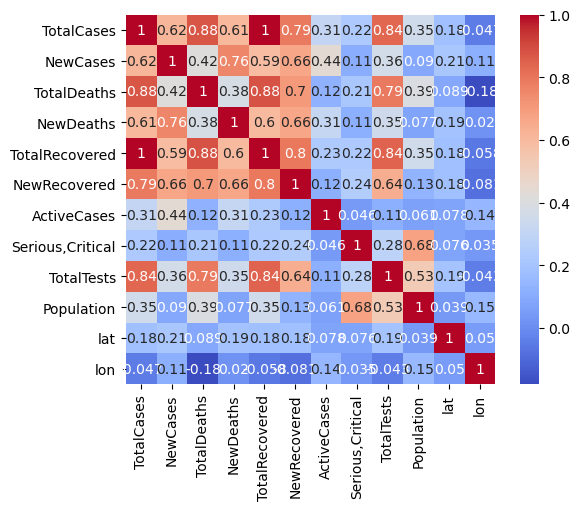

<Figure size 2000x2000 with 0 Axes>

In [18]:
corr_matrix = last_day.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.figure(figsize=(20, 20))
# show the plot
plt.show()

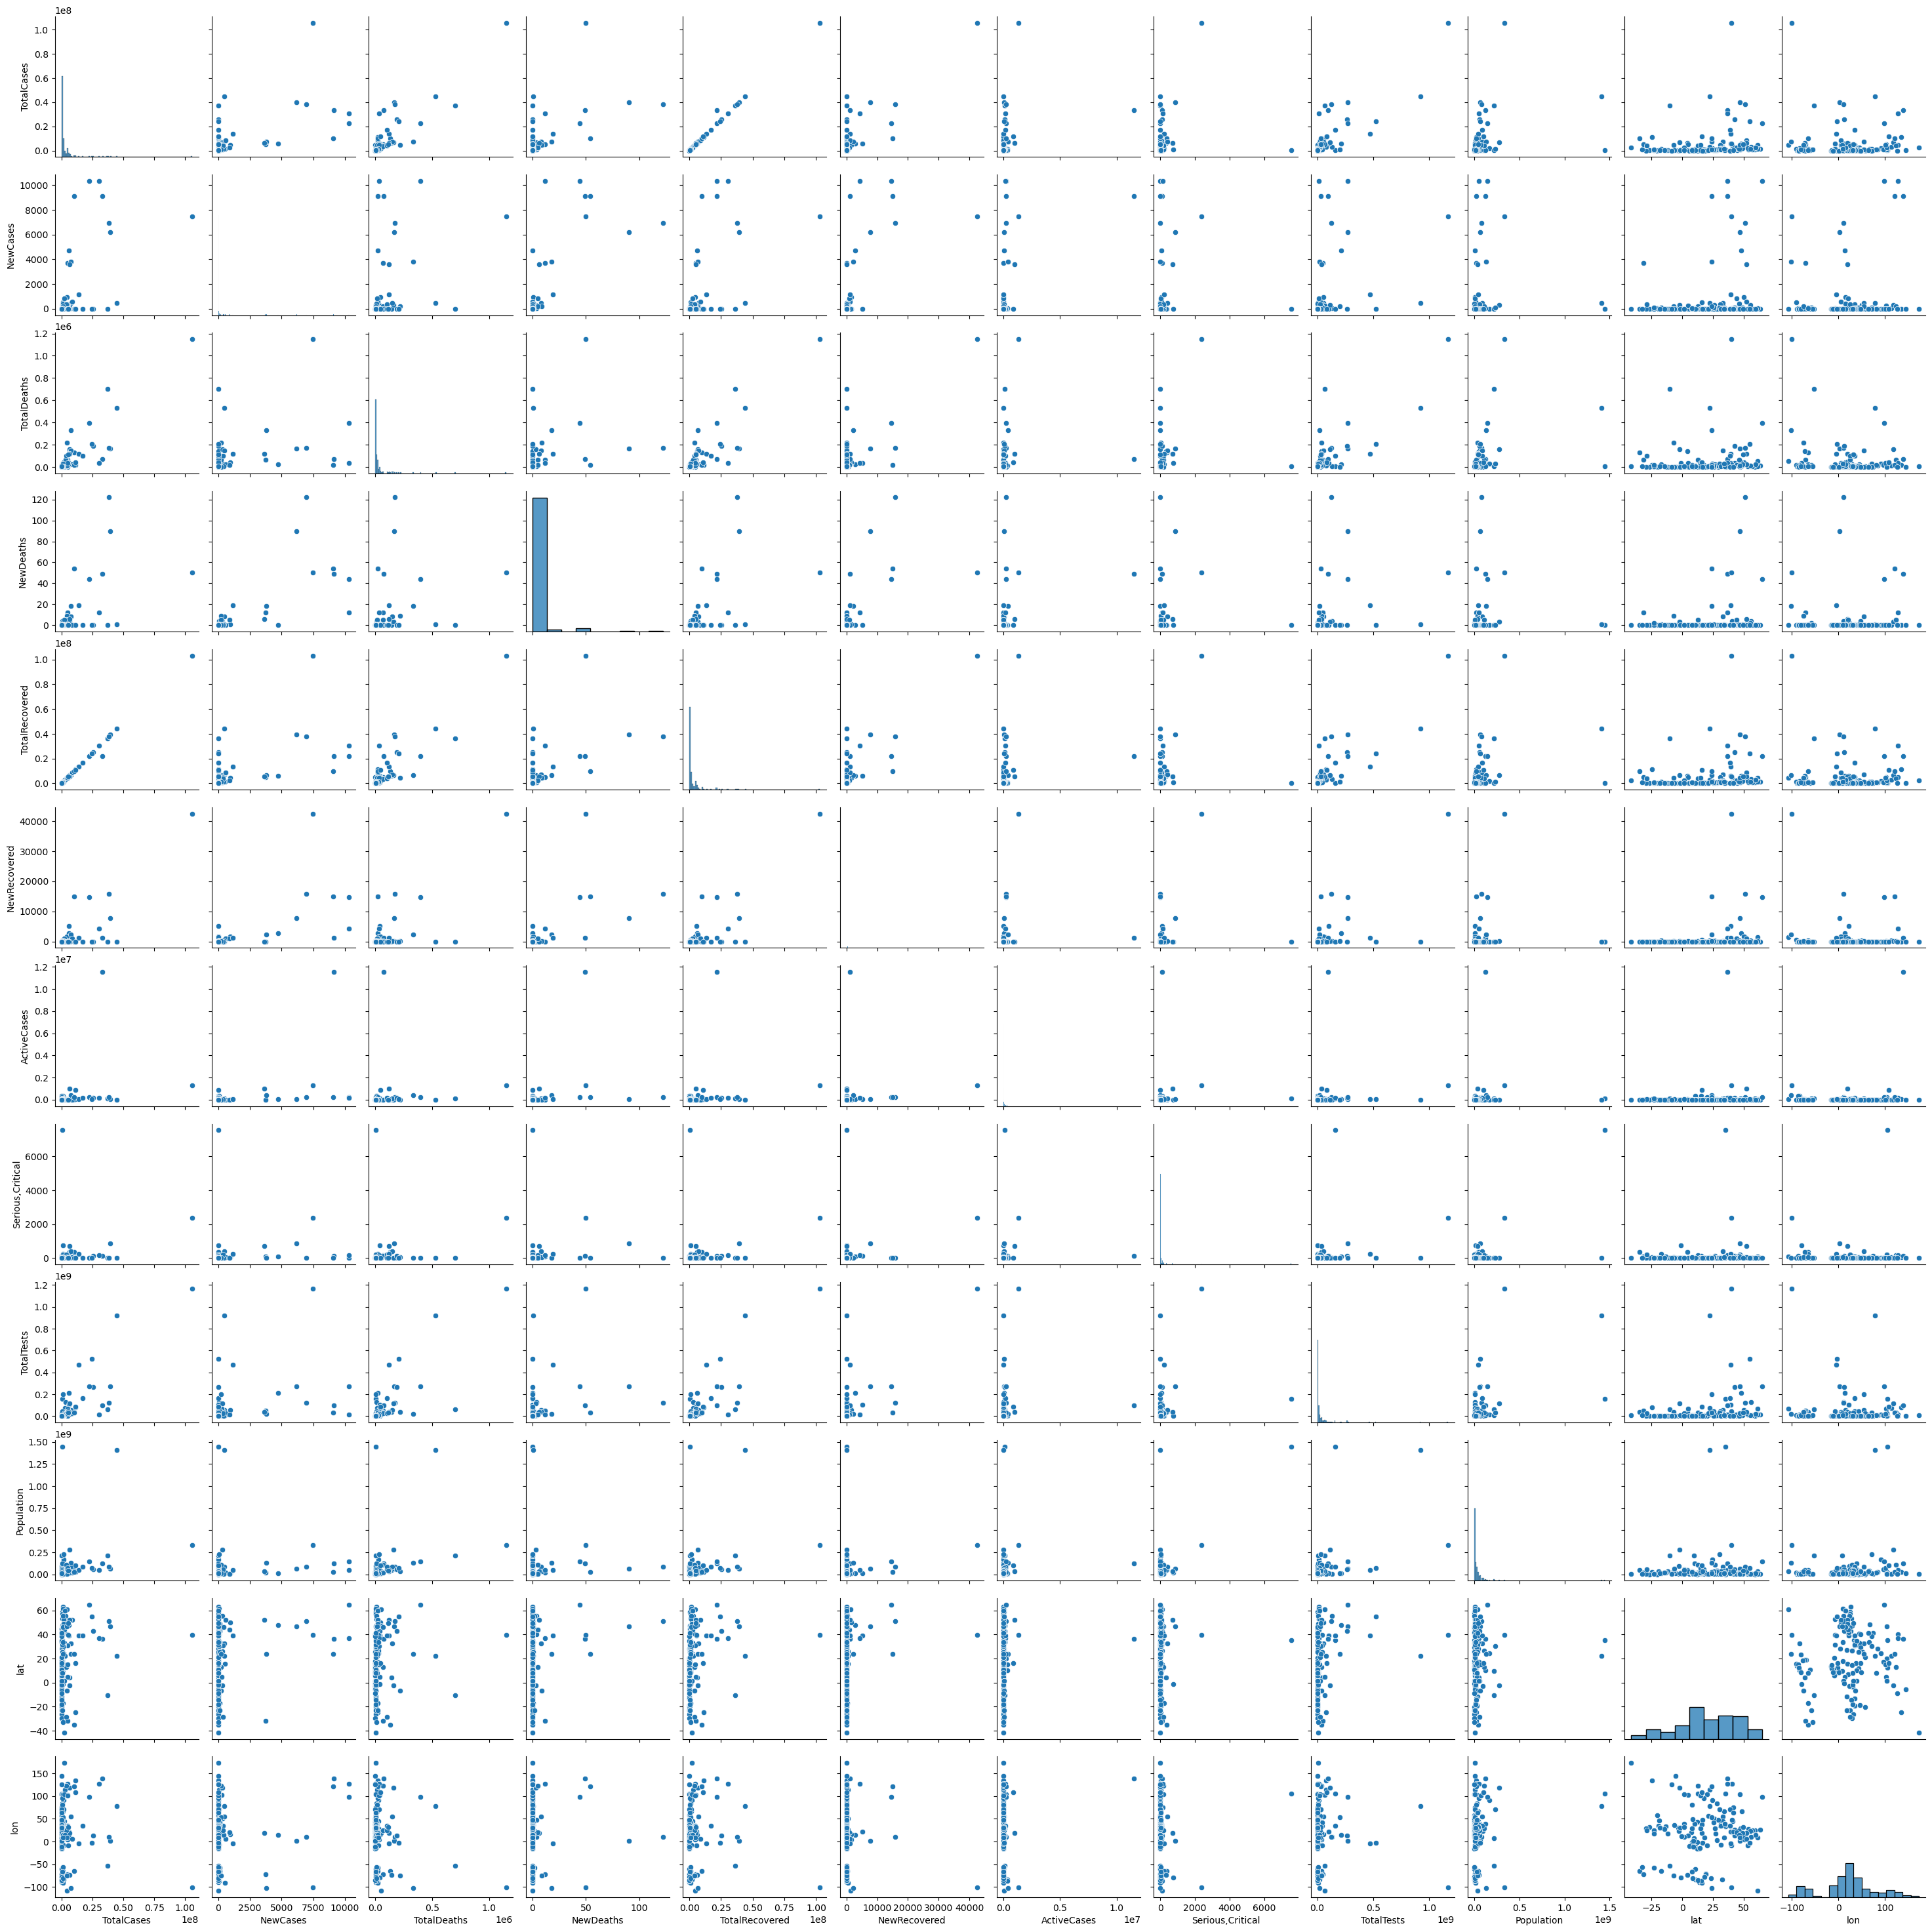

In [19]:


import seaborn as sns
# scatter_matrix(df, alpha=0.2, figsize=(12,12), diagonal='kde')
sns.pairplot(last_day)

- High correlation with TotalDeaths are TotalCases, TotalRecovered, and TotalTests. So we will use these variables to build a linear regression model. 

In [20]:
smf.ols('Q("TotalDeaths") ~ Q("TotalCases") + Q("TotalRecovered") + Q("TotalTests")', data=last_day).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q("TotalDeaths")   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.62e-51
Time:                        01:39:32   Log-Likelihood:                -1955.5
No. Observations:                 158   AIC:                             3919.
Df Residuals:                     154   BIC:                             3931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1828.3495   4947.863      0.370      0.712   -7946.094    1.16e+04
Q("TotalCases")        -0.0059      0.005     -1.122      0.264      -0.016       0.004
Q("TotalRecovered")     0.0147      0.006      2.650      0.009       0.004       0.026
Q("TotalTests")         0.0001   6.45e-05      2.033      0.044    3.69e-06       0.000
==============================================================================
Omnibus:                       99.559   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1959.428
Skew:                           1.795   Prob(JB):                         0.00
Kurtosis:                      19.874   Cond. No.                     1.53e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Model is: **TotalDeaths = 1828.3 - 0.0059 * TotalCases + 0.0147 * TotalRecovered + 0.0001 * TotalTests.**
- Model can explain 78,3% of the variance in TotalCases, TotalRecovered, and TotalTests. 